In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

nn = MLPClassifier(random_state=42)
nn.fit(x_train, y_train)

print('Accuracy of training set is:{:.3f}'.format(nn.score(x_train, y_train)))
print('Accuracy of test set is:{:.3f}'.format(nn.score(x_test, y_test)))

Accuracy of training set is:0.906
Accuracy of test set is:0.881


In [3]:
print('maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))

maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [4]:
s = StandardScaler()
x_train_scaled = s.fit(x_train).transform(x_train)
x_test_scaled = s.fit(x_test).transform(x_test)

nn1 = MLPClassifier(max_iter=1000, random_state=42)
nn1.fit(x_train_scaled, y_train)

print('Accuracy of scaled training set is:{:.3f}'.format(nn1.score(x_train_scaled, y_train)))
print('Accuracy of scaled test set is:{:.3f}'.format(nn1.score(x_test_scaled, y_test)))

Accuracy of scaled training set is:0.995
Accuracy of scaled test set is:0.958


In [5]:
nn2 = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
nn2.fit(x_train_scaled, y_train)

print('Accuracy of scaled training set is:{:.3f}'.format(nn2.score(x_train_scaled, y_train)))
print('Accuracy of scaled test set is:{:.3f}'.format(nn2.score(x_test_scaled, y_test)))

Accuracy of scaled training set is:0.988
Accuracy of scaled test set is:0.972


In [7]:
nn3 = MLPClassifier(max_iter=1000, random_state=42, solver='sgd')
nn3.fit(x_train_scaled, y_train)

print('Accuracy of scaled training set is:{:.3f}'.format(nn3.score(x_train_scaled, y_train)))
print('Accuracy of scaled test set is:{:.3f}'.format(nn3.score(x_test_scaled, y_test)))

Accuracy of scaled training set is:0.986
Accuracy of scaled test set is:0.951


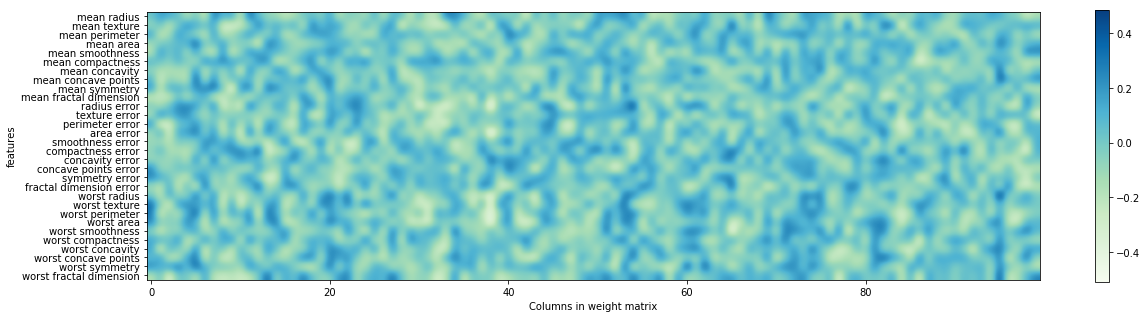

In [33]:
plt.figure(figsize=(20,5))
plt.imshow(nn1.coefs_[0],interpolation='quadric',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('features')
plt.colorbar()

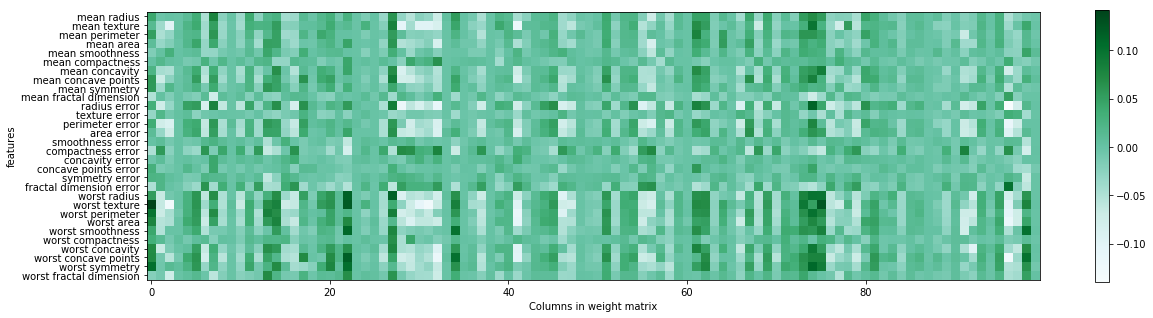

In [31]:
plt.figure(figsize=(20,5))
plt.imshow(nn2.coefs_[0],interpolation='none',cmap='BuGn')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('features')
plt.colorbar()

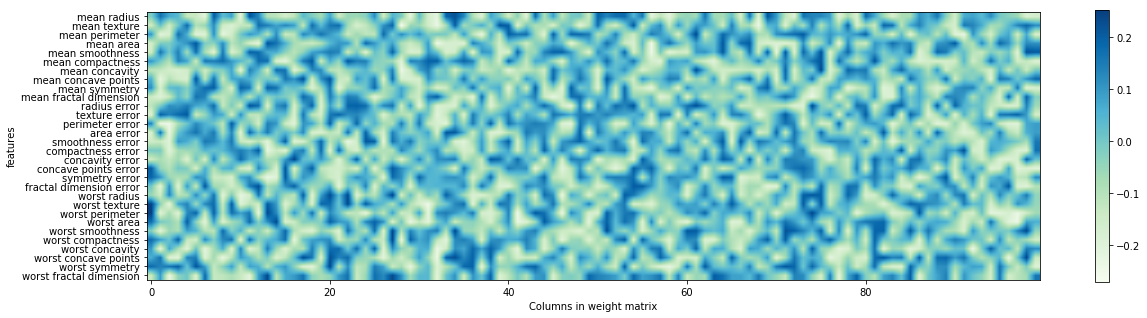

In [29]:
plt.figure(figsize=(20,5))
plt.imshow(nn3.coefs_[0],interpolation='bilinear',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('features')
plt.colorbar()